# Prelude
Importing Modules and loading Data

In [1]:
import numpy as np
import pandas as pd
import pathlib as pl

In [2]:
# matplotlib setup
import matplotlib.pyplot as plt
%matplotlib widget
plt.style.use('bmh')

In [3]:
DATA_PATH = "../data/"
def read_data(subdir: str):
    data = [x for x in (pl.Path(DATA_PATH)/subdir).iterdir() if x.suffix == ".csv"]
    data = [pd.read_csv(d) for d in data]
    data = pd.concat(data)
    return data[["timestamp", "differential_potential_CH1", "differential_potential_CH2", "transpiration"]]

data_temp = read_data("exp_Temperature")
data_wind = read_data("exp_Wind")

In [18]:
display(data_temp.head(3))
display(data_wind.head(3))
print(f"data types:\n\nTemperature:\n\n{data_temp.dtypes}\n\nWind:\n{data_wind.dtypes}")

,timestamp,differential_potential_CH1,differential_potential_CH2,transpiration
0,2022-01-22 13:53:42,526487,467544,442
1,2022-01-22 13:53:44,526542,467315,461
2,2022-01-22 13:53:45,526532,466868,466


,timestamp,differential_potential_CH1,differential_potential_CH2,transpiration
0,2022-01-22 13:53:37,505940,507749,621
1,2022-01-22 13:53:38,505846,507807,632
2,2022-01-22 13:53:40,505990,507764,629


data types:

Temperature:

timestamp                     object
differential_potential_CH1     int64
differential_potential_CH2     int64
transpiration                  int64
dtype: object

Wind:
timestamp                     object
differential_potential_CH1     int64
differential_potential_CH2     int64
transpiration                  int64
dtype: object


# Direct Visualization

In [12]:
def plot_differential_potential(df: pd.DataFrame):
    fig, ax = plt.subplots()
    ax.scatter(df.loc[:, "timestamp"].tolist(), df[:, "differential_potential_CH1"].tolist())
    plt.show()

In [13]:
data_temp.loc[:,"differential_potential_CH1"].tolist();

InvalidIndexError: (slice(None, None, None), 'differential_potential_CH1')

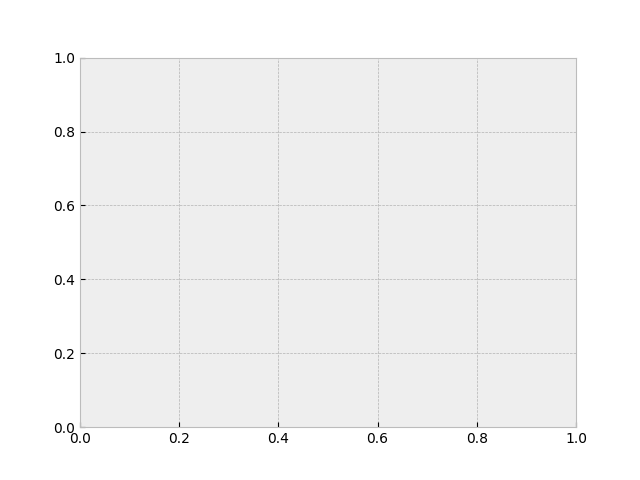

In [14]:
plot_differential_potential(data_temp)

In [ ]:
1+1